<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 인공 신경망

7장에서 사용한 밀집층에는 뉴런마다 입력 개수만큼의 가중치가 있어, 모든 입력에 가중치를 곱함

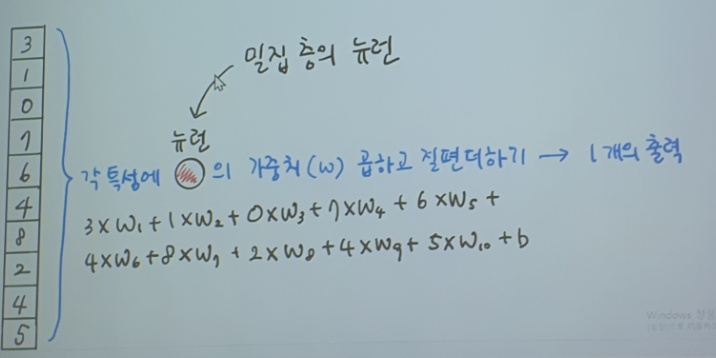

인공신경망은 처음에 가중치들과 절편을 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아감

이것이 바로 모델 훈련임

예를 들어 밀집층에 뉴런 3개 있다면 입력의 개수와 상관없이 출력은 3개가 됨

### 합성곱 신경망(convolution neural network)

합성곱은 밀집층의 계산과 조금 다름

입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱함

예를 들어, 입력값이 10개이고 뉴런이 3개의 가중치를 가지고 있다면, 1,2,3번쨰 입력에 대한 뉴런을 수행하고 다음에는 2,3,4번째 입력에 대해서 반복

반복 결과 8개의 출력이 나오게 되며, 여기서 사용되는 하나의 뉴런의 가중치와 절편은 동일

오른쪽 그림의 뉴런의 색이 각각 다르지만 이는 구분을 쉽게 하기 위해 색을 구분한 것이고 실제로는 동일한 뉴런임


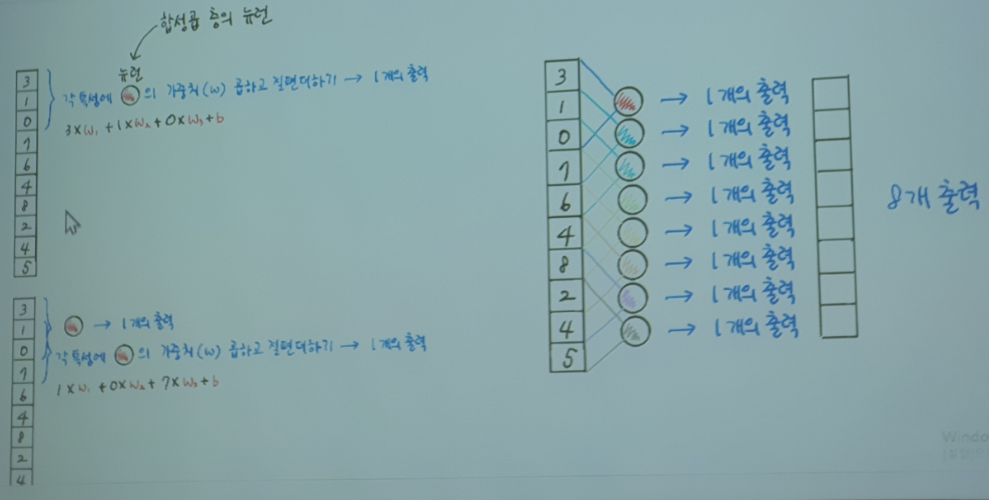

합성공 신경망에서는 완전 연결 신경망(7장에서 만든 신경망)과 달리 뉴런을 <b>필터(filter)</b> 또는 <b>커널(kernel)</b>이라고 부름

이 책에서 필터는 뉴런 개수를 표한할 때 사용되며, 커널은 입력에 곱하는 가중치를 뜻함

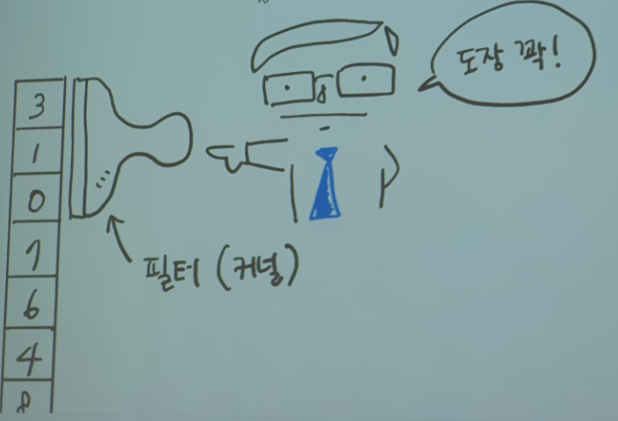

합성곱은 1차원이 아니라 2차원에서도 적용할 수 있는 장점이 있음

입력이 2차원 배열이면 필터도 2차원이어야 함

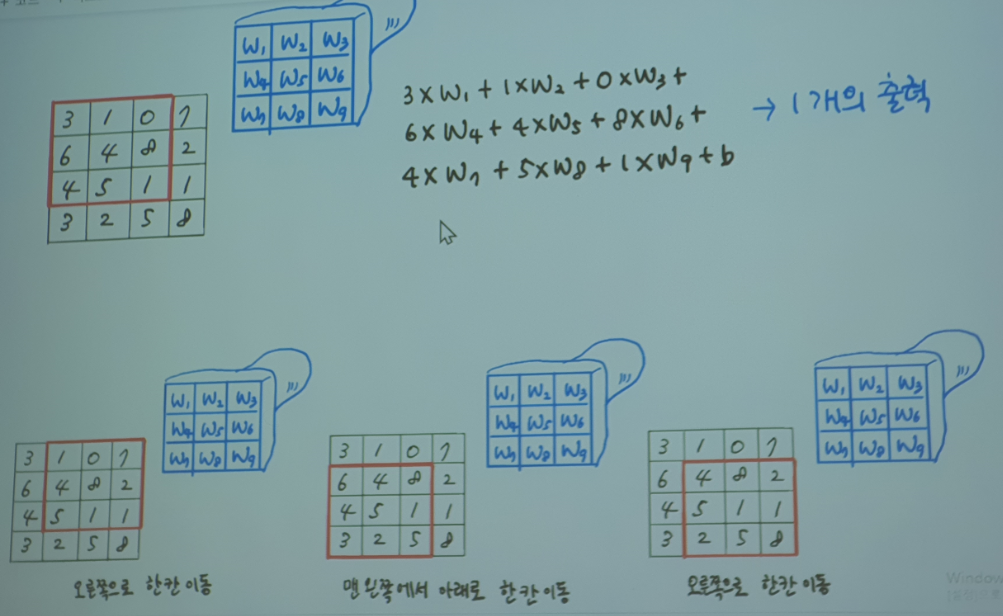

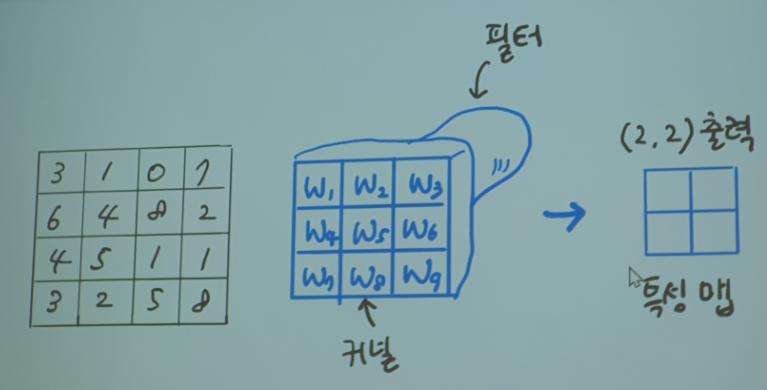

### 특성 맵

합성곱 계산을 통해 얻은 출력으로 활성화 함수가 적용된 값임

밀집층에서 여러개의 뉴런을 사용하듯이 합성곱 층에서도 여러개의 필터를 사용할 수 있음

여러개의 필터를 사용하면 만들어진 특성맵은 순서대로 차곡차곡 쌓임

(2,2) 크기의 특성 맵을 쌓으면 (2,2,3)의 3차원 배열이됨

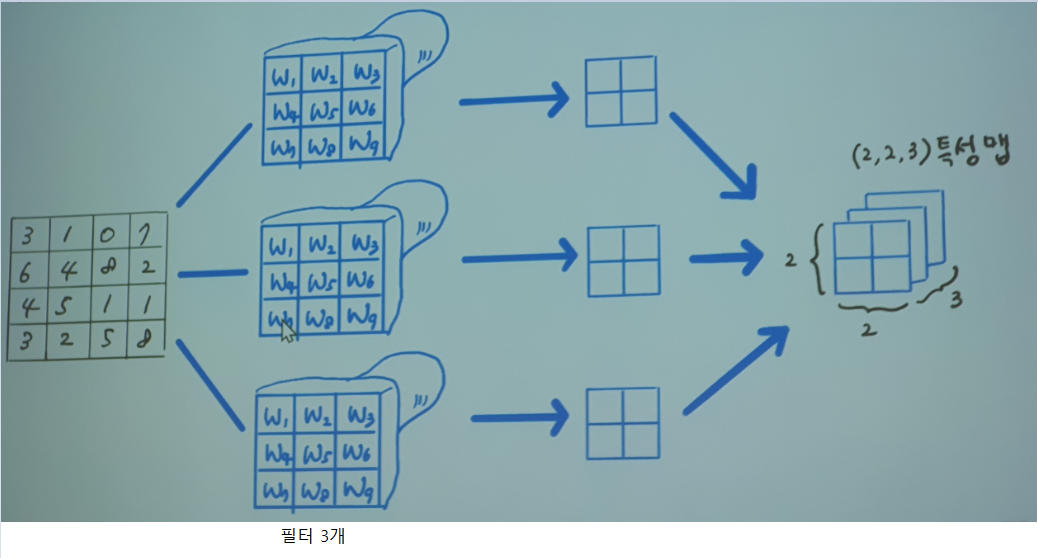

밀집층에 있는 뉴런의 가중치가 모두 다르듯이 합성곱 층에 있는 필터의 가중치(커널)도 모두 다름



## 밀집층 vs 합성곱

계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하고 절편을 더한 것

차이는 다음과 같음

1. 2차원 형태를 유지

2. 입력보다 훨씬 작은 크기의 커널을 사용

이렇게 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이 이미지 처리 분야에서 뛰어난 성능을 발휘




### 케라스 합성곱 층

keras.layers 패키지 아래의 클래스로 구현됨

위와 같은 합성곱은 Conv2D 클래스로 제공됨

In [3]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3),activation="relu")

Conv2D의 첫번째 매개변수는 필터의 개수 -> 도장의 개수

kernel_size는 필터에 사용할 커널의 크기(하이퍼파라미터이며, 보통(3,3), (5,5)추천) -> 도장의 크기

activation은 활성화 함수, 여기서는 렐루 함수 사용

참고로 특성맵은 활성화 함수가 적용된 값임

## 패딩

커널 크기를 고정하면서도 출력의 크기를 입력과 동일하게 만들기 위해 입력 배열 주우를 가상의 원소로 채우는 것

실제 입력값은 아니므로 0으로 채워지며 계산에 영향을 주지 않음

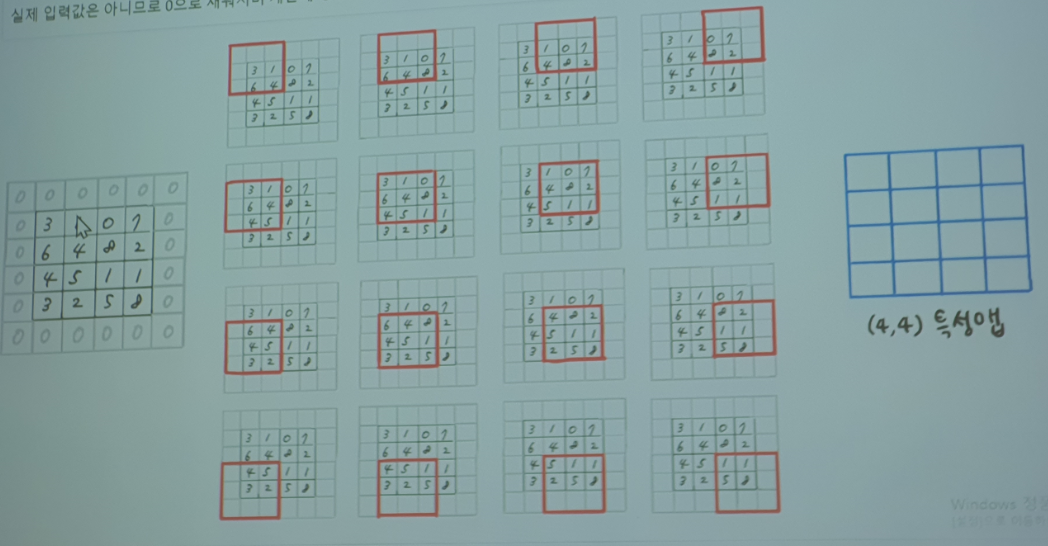

### 세임 페딩(same padding)

입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것

합성곱 신경망에서는 세임 패딩이 많이 사용됨



### 벨리드 패딩(valid padding)

패딩없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 것

특성 맵의 크기가 줄어듦

### 왜 합성곱에서는 패딩을 즐겨 사용하는가?

패딩이 없다면 모서리 값들은 커널 도장에 딱 한번만 쓰이지만 다른 원소들은 2번 이상 커널과 계산됨

즉, 모서리에 있는 중요한 정보가 특성 맵으로 잘 전달되지 않을 가능성이 높고 가운데 있는 정보는 두드러지게 표현될 것임

패딩을 하지 않을 경우, 중앙과 모서리 픽셀이 합성곱에 참여하는 비율이 (4:1) 로 크게 차이가 남

반면에 패딩을 한다면 (9:4)로 차이가 감소함

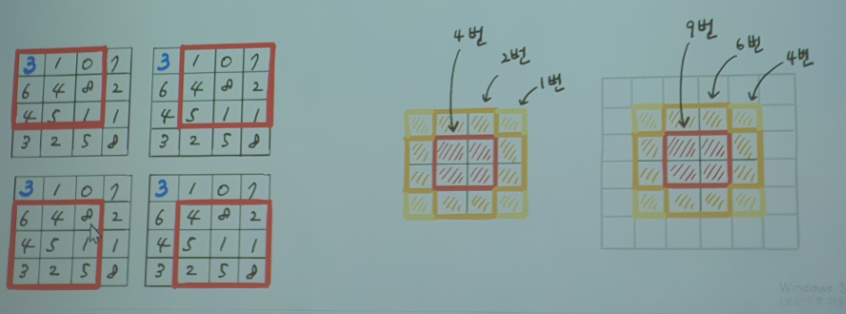

In [4]:
keras.layers.Conv2D(10,kernel_size=(3,3), activation ='relu', padding = 'same')

## 스트라이드(stride)

합성곱 연산에서 커널이 이동하는 칸수

기본값이 1로 좌우, 위아래로 한칸씩 이동함

이동하는 크기를 (1,1)과 같이 튜플을 사용해 각각 지정 가능

합성곱 연산 횟수와 특성맵의 크기를 줄이는 역할을 하나, 자주 사용되지는 않음

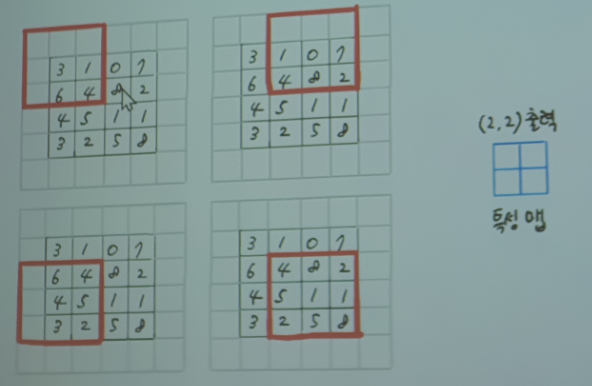

## 풀링(pooling)

합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 함

그러나 <b>특성맵의 개수는 줄이지 않음</b>

합성곱처럼 입력 위를 지나가면서 도장을 찍으나 가중치가 없으며 겹치지 않음

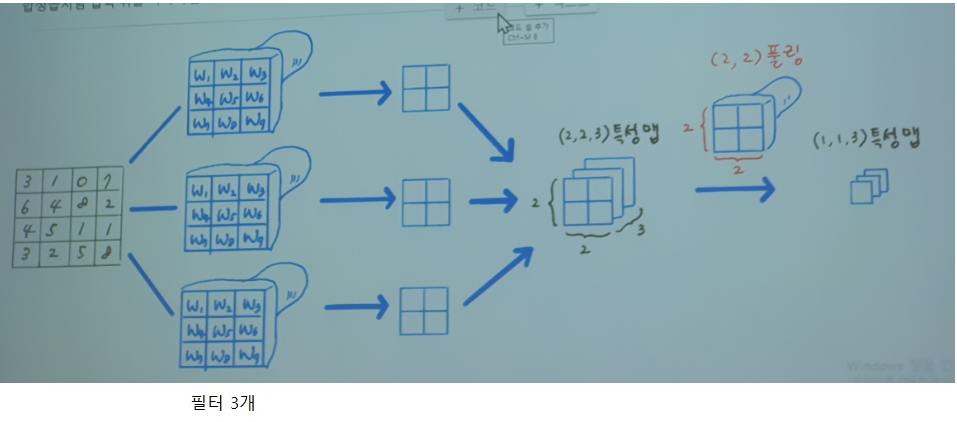

### 최대 풀링(max pooling)

도장을 찍는 영역에서 가장 큰값을 선택


### 평균 풀링(average pooling)

도장을 찍는 영역의 평균값을 계산함

### 풀링을 사용하는 이유

합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링 중에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 떄문

따라서 합성곱 신경망은 합성곱 층에서 특성 맵을 생성하고 풀링에서 크기를 줄이는 구조가 쌍을 이룸

합성곱 층과 뚜렷이 구분되기 때문에 풀링층이라고 부름

예제 (4,4) 크기의 특성맵에 (2,2) 최대 풀링 적용

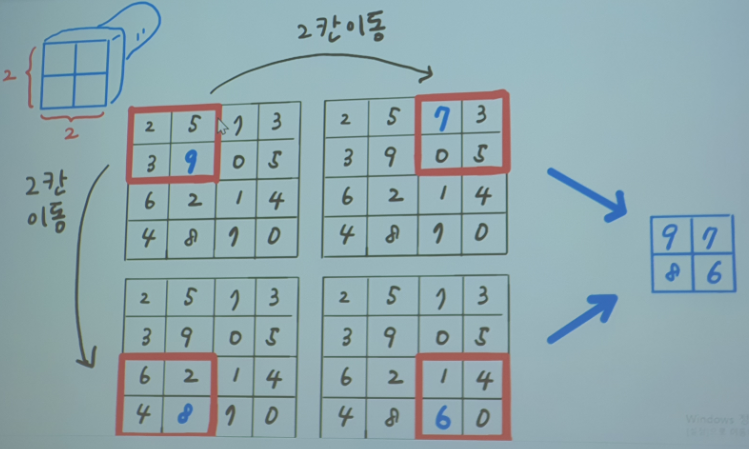

In [ ]:
# 최대풀링
keras.layers.MAXPooling2D(2, strides=2, padding="valid")
#첫번째 매개변수는 풀링의 크기로서 2로 지정
# 사용이 극히 드무나 가로 세로 크기를 다르게 지정하는 것도 가능 예) (2,3)
# 두번쨰 매개변수는 스트라이더 이며, 기본값은 풀링의 크기가 자동으로 지정됨
# 따라서 굳이 따로 지정할 필요가 없음
# 세번째 매개변수는 패딩으로 기본값은 'valid' 이며 패딩을 하지 않음
# 풀링은 패딩을 하지 않기 때문에 이 매개변수를 지정할 필요는 거의 없음

# 평균 풀링
keras.layers.AveragePooling2D(2,strides=2,padding='valid')
# 최대값 대신 평균값을 계산한다는 것만 뺴고는 동일 (매개변수도 동일)
# 대부분 최대 풀링을 많이 사용함

## 합성곱 신경망의 전체 구조

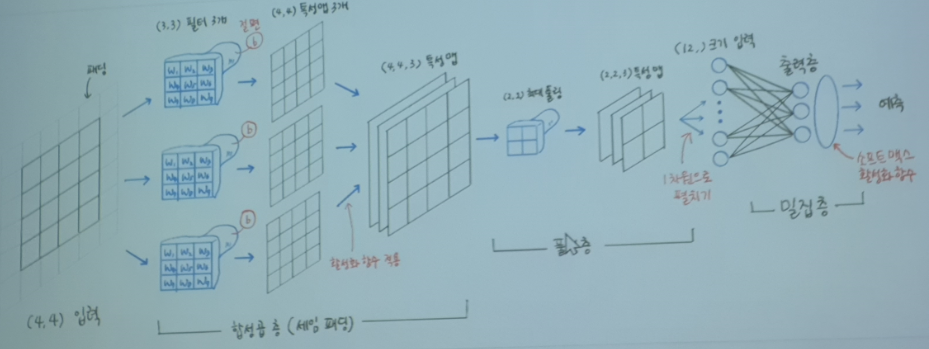

예제)

1. 입력층

  * (4,4)크기의 입력으로 받음

2. 합성공 층 (세일 패딩)

  * 세일 패딩을 적용하여 (4,4)크기의 특성 맵 3개를 얻음
  * 각 특성 맵에 활성화 함수 적용
  * (4,4,3) 특성 맵을 얻음

3. 풀링층

  * 각 특성 맵의 크기를 (4,4)에서 (2,2)로 줄이기 위해, (2,2) 최대 풀링을 적용
  * (2,2,3) 특성 맵을 얻음

4. 밀집층

 * (2,2,3) 특성맵을 출력층으로 전달하기 위해 3차원 배열을 1차원으로 펼침
 * Flatten 클래스를 이용하여 12개의 원소를 가진 1차원 배열로 변경
 * 3개의 클래스를 분류하기 위해 3개의 뉴런을 배치

5. 출력층
  * 3개의 뉴런의 출력값에 소프트맥스 활성화 함수를 사용하여 최종 예측 확률로 변환

이중에서 합성곱 층과 풀링 층은 쌍을 이루어 여러번 반복될 수 있음

즉, 1 => 2 => 3 => 2" => 3" => 4 => 5 가 가능함

그러나 2"와 3"의 입력값의 크기는 2와 3과는 다르다는 것에 주의할 것

### 컬러 이미지를 사용한 합성곱

컬러 이미지는 RGB 채널로 구성되기 때문에 3차원 배열로 표시

하나의 컬러 이미지는 너비와 높이 차원 외에 깊이(또는 채널) 차원이 있음

예를 들어 흑백 이미지(4,4)라면 컬러 이미지는 (4,4,3)

길이가 있는 입력에서 합성곱을 수행하기 위해서는 커널도 깊이가 필요함

즉, 필터의 커널 크기나 (3,3)이 아니라 (3,3,3)

커널 배열의 길이는 항상 입력의 깊이와 같음

따라서 입력과 필터의 차원이 몇개인지 상관없이 항상 출력은 하나의 값임

케라스의 합성곱 층은 입력이 3차원일 것을 기대하므로 2차원 이미지는 깊이 차원이 1인 3차원 배열로 변환

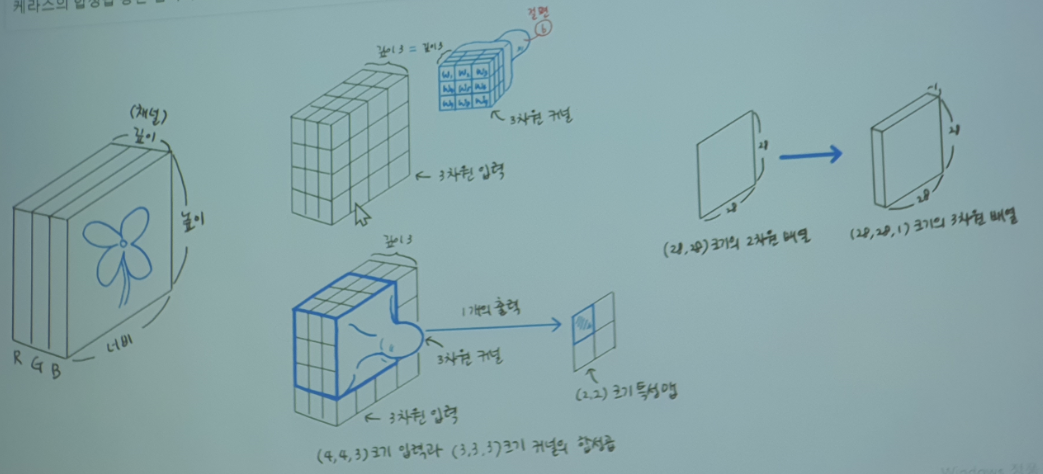

### 합성곱 층과 풀링층 반복 사용

예제:

입력이 (4,4,3)이고 (3,3,3( 크기의 커널을 가지는 5개의 필터가 있다고 가정

패딩을 사용하고 첫번쨰 풀링 층을 통과한 특성 맵의 크기는 (4,4,10)

합성곱 층과 풀링층을 한번 더 반복한다면?

두번째 합성곱 층의 필터 개수가 10개라면 만들어진 특성 맵의 크기는 (2,2,10)이 됨

즉, 깊이가 추가됨

합성곱 신경망은 너비와 높이는 점점 줄어들지만 깊이는 점점 깊어지는 것이 특징임

이후 밀집층은 특성 맵을 모두 펼처서 밀집층의 입력으로 사용


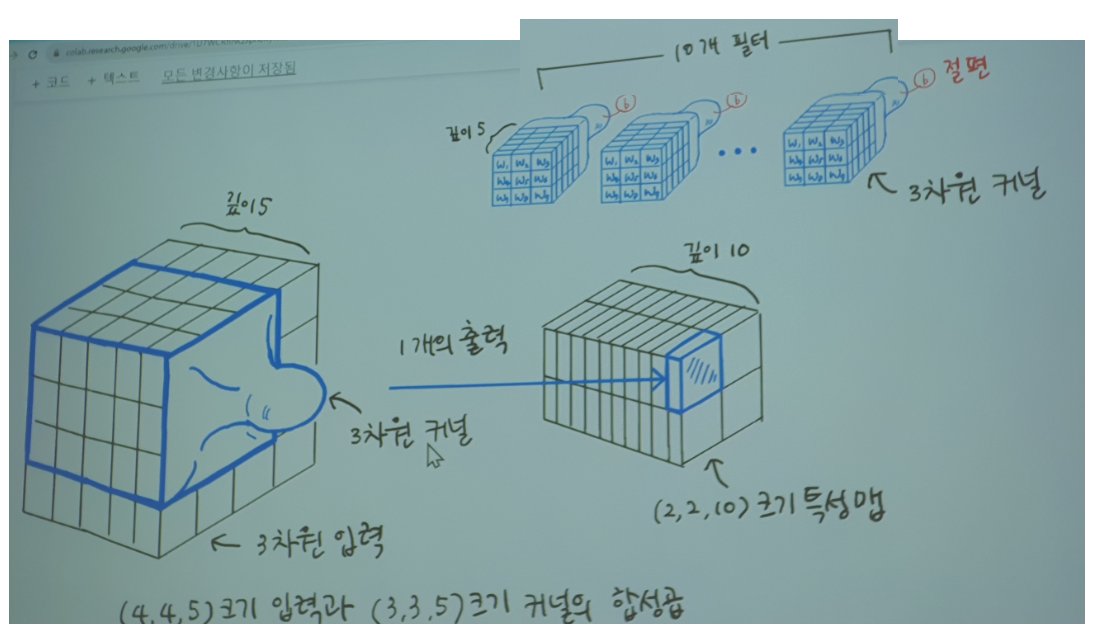

### 이미지 분석을 위한 합성곱 신경망 모델 이용

합성곱 신경망에서 필터는 이미지에 있는 어떤 특징을 찾는다고 생각할 수 있음

처음에는 간단한 기본적인 특징 (직선, 곡선 등)을 찾고 층이 깊어질수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 개수를 늘림

또한 어떤 특징이 이미지의 어느 위치에 놓이더라도 쉽게 감지 할 수 있도록 너비와 높이 차원을 점점 줄여나감

자세한 것은 다음 절들을 통해 직접 이해할 수 있음